In [54]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy

device = 'cuda' if torch.cuda.is_available() else 'cpu'

print("using", device)

torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed(777)

using cuda


In [55]:
batch_size = 256
noise_dim = 100
epoch = 500

test_len = 10
test_num = 50

lr_G = 0.0002
lr_D = 0.0002
k = 1

In [56]:
mnist_train = torchvision.datasets.MNIST(
    root = '../MNIST_data',
    train = True, 
    transform = torchvision.transforms.ToTensor(), 
    download = True
)
"""
mnist_test = torchvision.datasets.MNIST(
    root = '../MNIST_data', 
    train = False, 
    transform = torchvision.transforms.ToTensor(), 
    download = True
)
"""

"\nmnist_test = torchvision.datasets.MNIST(\n    root = '../MNIST_data', \n    train = False, \n    transform = torchvision.transforms.ToTensor(), \n    download = True\n)\n"

In [57]:
data_loader = torch.utils.data.DataLoader(
    dataset = mnist_train,
    shuffle = True,
    batch_size = batch_size,
    drop_last = True,
)

In [58]:
class discriminator(torch.nn.Module): # 28x28 size inputs -> true/false(classification)
    def __init__(self) -> None:
        super().__init__()
        self.act = torch.nn.LeakyReLU(0.2)
        self.conv1 = torch.nn.Conv2d(1, 64, 4, 2, 1, bias=False)
        self.conv2 = torch.nn.Conv2d(64, 128, 4, 2, 1, bias=False)
        self.batchnorm2 = torch.nn.BatchNorm2d(128)
        self.conv3 = torch.nn.Conv2d(128, 256, 3, 2, 1, bias=False)
        self.batchnorm3 = torch.nn.BatchNorm2d(256)
        self.conv4 = torch.nn.Conv2d(256, 1, 4, 1, 0, bias=False)
        self.sig = torch.nn.Sigmoid()
        
        torch.nn.init.kaiming_uniform_(self.conv1.weight)
        torch.nn.init.kaiming_uniform_(self.conv2.weight)
        torch.nn.init.kaiming_uniform_(self.conv3.weight)
        torch.nn.init.kaiming_uniform_(self.conv4.weight)
    
    def forward(self, x):
        out = self.conv1(x)
        out = self.act(out)

        out = self.conv2(out)
        out = self.batchnorm2(out)
        out = self.act(out)

        out = self.conv3(out)
        out = self.batchnorm3(out)
        out = self.act(out)

        out = self.conv4(out)
        out = self.sig(out)
  
        out = out.view(-1)
        return out


In [59]:
class generator(torch.nn.Module): # 28x28 size inputs -> true/false(classification)
    def __init__(self, noisedim) -> None:
        super().__init__()
        self.noisedim = noisedim
        
        self.act = torch.nn.ReLU()
        self.conv1 = torch.nn.ConvTranspose2d(noise_dim, 256, 4, 1, 0, bias=False)
        self.batchnorm1 = torch.nn.BatchNorm2d(256)
        self.conv2 = torch.nn.ConvTranspose2d(256, 128, 3, 2, 1, bias=False)
        self.batchnorm2 = torch.nn.BatchNorm2d(128)
        self.conv3 = torch.nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False)
        self.batchnorm3 = torch.nn.BatchNorm2d(64)
        self.conv4 = torch.nn.ConvTranspose2d(64, 1, 4, 2, 1, bias=False)
        self.Tanh = torch.nn.Tanh()
        
        torch.nn.init.kaiming_uniform_(self.conv1.weight)
        torch.nn.init.kaiming_uniform_(self.conv2.weight)
        torch.nn.init.kaiming_uniform_(self.conv3.weight)
        torch.nn.init.kaiming_uniform_(self.conv4.weight)
    
    def forward(self, x):
        out = self.conv1(x)
        out = self.batchnorm1(out)
        out = self.act(out)

        out = self.conv2(out)
        out = self.batchnorm2(out)
        out = self.act(out)

        out = self.conv3(out)
        out = self.batchnorm3(out)
        out = self.act(out)

        out = self.conv4(out)
        out = self.Tanh(out)

        return out


In [60]:
def generate_noise(noisenum, noisedim):
    return torch.randn(noisenum, noisedim, 1, 1).to(device)

In [61]:
def generate_labels(labelnum):
    return torch.zeros(labelnum).to(device), torch.ones(labelnum).to(device)

In [62]:
G = generator(noise_dim).to(device) #generator
D = discriminator().to(device) #discriminator
criterion = torch.nn.BCELoss()
G_optim = torch.optim.Adam(G.parameters(), lr = lr_G)
D_optim = torch.optim.Adam(D.parameters(), lr = lr_D)
noise_for_print = generate_noise(test_len, noise_dim)
fake_labels, real_labels = generate_labels(batch_size)
print_per = epoch / test_num
idx = 1

EPOCH : 1 GLOSS: 6.427577018737793 DLOSS: 0.0048712072893977165


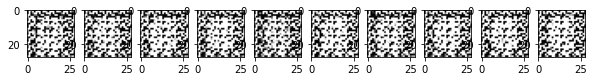

EPOCH : 2 GLOSS: 7.666875839233398 DLOSS: 0.0010591259924694896
EPOCH : 3 GLOSS: 9.461198806762695 DLOSS: 0.00019944796804338694
EPOCH : 4 GLOSS: 7.813417434692383 DLOSS: 0.0007149704033508897
EPOCH : 5 GLOSS: 8.825387954711914 DLOSS: 0.00028516841121017933
EPOCH : 6 GLOSS: 8.842724800109863 DLOSS: 0.00036873380304314196
EPOCH : 7 GLOSS: 10.575916290283203 DLOSS: 0.0011806123657152057
EPOCH : 8 GLOSS: 10.723936080932617 DLOSS: 0.0010512515436857939
EPOCH : 9 GLOSS: 9.667491912841797 DLOSS: 0.0012421896681189537
EPOCH : 10 GLOSS: 10.42019271850586 DLOSS: 0.00037960411282256246
EPOCH : 11 GLOSS: 8.146392822265625 DLOSS: 0.0007186942966654897


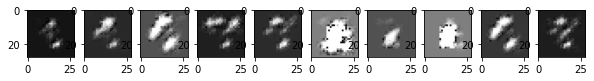

EPOCH : 12 GLOSS: 10.493892669677734 DLOSS: 0.0004746774211525917
EPOCH : 13 GLOSS: 7.977260589599609 DLOSS: 0.0042818584479391575
EPOCH : 14 GLOSS: 7.304009437561035 DLOSS: 0.0031212540343403816
EPOCH : 15 GLOSS: 7.576892852783203 DLOSS: 0.002444234909489751
EPOCH : 16 GLOSS: 7.492439270019531 DLOSS: 0.0037671474274247885
EPOCH : 17 GLOSS: 7.691825866699219 DLOSS: 0.00432544806972146
EPOCH : 18 GLOSS: 8.187904357910156 DLOSS: 0.0027675461024045944
EPOCH : 19 GLOSS: 9.744535446166992 DLOSS: 0.0018708944553509355
EPOCH : 20 GLOSS: 8.004973411560059 DLOSS: 0.0030032391659915447
EPOCH : 21 GLOSS: 8.799368858337402 DLOSS: 0.0015135472640395164


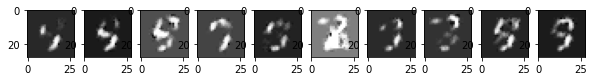

KeyboardInterrupt: 

In [63]:
real_images_arr = []

for i, (image, label) in enumerate(data_loader):
    real_images_arr.append(image.to(device).view(-1, 1, 28, 28))

for i in range(epoch):
    for real_images in real_images_arr:
        random_noises = generate_noise(batch_size, noise_dim)
        fake_images = G(random_noises)
        real_outs = D(real_images)
        fake_outs = D(fake_images)
        
        D_loss = criterion(real_outs, real_labels) + criterion(fake_outs, fake_labels)
        
        D_optim.zero_grad()
        G_optim.zero_grad()
        D_loss.backward()
        D_optim.step()

        
        fake_images = G(random_noises)
        outputs = D(fake_images)
        G_loss = criterion(outputs, real_labels)

        D_optim.zero_grad()
        G_optim.zero_grad()
        G_loss.backward()
        G_optim.step()

    print("EPOCH :", i + 1, "GLOSS:", G_loss.item(), "DLOSS:", D_loss.item())

    if i % print_per == 0:
        generated_images = G(noise_for_print).view(test_len, 28, 28)
        plt.figure(figsize = (10, 100))
        for j in range(test_len):
            plt.subplot(1, test_len, j + 1)
            idx = idx + 1
            plt.imshow(generated_images.detach().cpu().numpy()[j], cmap = 'gray')
        plt.show()

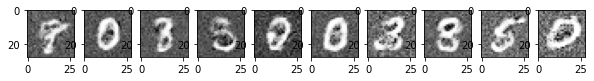

In [ ]:
noise_for_print = generate_noise(test_len, noise_dim)
generated_images = G(noise_for_print).view(test_len, 28, 28)
plt.figure(figsize = (10, 100))
for j in range(test_len):
    plt.subplot(1, test_len, j + 1)
    idx = idx + 1
    plt.imshow(generated_images.detach().cpu().numpy()[j], cmap = 'gray')
plt.show()